In [5]:
olo = 5
olo

5

In [6]:
import sys
!conda install --yes --prefix {sys.prefix} faker

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [7]:
#import library
from faker import Faker
import pandas as pd
import random
from random import randint 


#Generate Country and Language
fake=Faker(locale='id_ID')

#Geberate account table
def create_account(num_account):
    account=pd.DataFrame()
    for i in range(0,num_account):
        account.loc[i,'id']= str(randint(1245968, 9857483))
        account.loc[i,'first_name']=fake.first_name()
        account.loc[i,'last_name']=fake.last_name()
        account.loc[i,'email']=fake.ascii_free_email()
        account.loc[i,'phone_number']=fake.phone_number()
        account.loc[i,'is_verified']=fake.random_element(elements=("yes","no"))
    return account

#create 100 account
account=create_account(100)
#save data into csv
account.to_csv("account.csv",index=False)

#Generate Transaction Table
def transaction(num_trans):
    trans=pd.DataFrame()
    for i in range(0,num_trans):
        trans.loc[i,'transaction_id']= fake.bothify(text='FT#########')
        trans.loc[i,'created_at']=fake.date_time_between(start_date='-2y', end_date='now', tzinfo=None)
        trans.loc[i,'recipient_bank']=fake.random_element(elements=("Dana","Gopay","LinkAja","Ovo","Shopeepay","BRI","BNI","BSI","BCA",
                                                                   "Mandiri","JAGO","Maybank","Permata","Seabank","Muamalat","BJB"))
        trans.loc[i,'account_number']=fake.aba()
        trans.loc[i,'amount']=fake.random_int(min=10, max=5000, step=1000)
        trans.loc[i,'unique_code']=fake.random_int(min=50, max=999)
        trans.loc[i,'transaction_status']=fake.random_element(elements=("Need Confirmation","Checking","Processed","Success","Failed","Cancelled"))
    return trans
#generate 1000 transaction 
trans=transaction(10000)

#generate admin fee based on random 0 or 1500
trans['admin_fee']=random.choices([0,1500],k=len(trans))
#generate relational user id in account table and transaction table
trans['user_id']=random.choices(account["id"], k=len(trans))
#save data into csv
trans.to_csv("transaction.csv",index=False)

#Make Payment table
def payment(num_trans):
    payment=pd.DataFrame()
    for i in range(0,num_trans):
        payment.loc[i,'payment_id']= fake.bothify(text='FP#####')
        payment.loc[i,'send_at']=fake.date_time_between(start_date='-2y', end_date='now', tzinfo=None)
        payment.loc[i,'payment_method']=fake.random_element(elements=("BCA","BNI","BRI","BSI","CIMB","Danamon","Digibank","Mandiri","Muamalat","Permata","Jenius"))
        payment.loc[i,'account_number']=fake.aba()
        payment.loc[i,'payment_status']=fake.random_element(elements=("Success","Failed","Cancelled"))
    return payment

#generate 1000 payment process
pay=payment(10000)
#generate relational transaction id in trans table and payment table
pay['transaction_id']=random.choices(trans["transaction_id"], k=len(pay))
#save data into csv
pay.to_csv("payment.csv",index=False)

In [8]:
df = pd.read_csv("transaction.csv")
df[df["user_id"] == 3757280]

,transaction_id,created_at,recipient_bank,account_number,amount,unique_code,transaction_status,admin_fee,user_id


In [9]:
import csv
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()
num_records = 100000
user_ids = [i for i in range(1, 1001)]
account_ids = [i for i in range(5001, 6001)]
beneficiary_ids = [i for i in range(7001, 8001)]
merchant_ids = [i for i in range(3001, 3101)]
currencies = ['USD', 'EUR', 'GBP']
transaction_types = ['payment', 'refund', 'transfer', 'withdrawal', 'deposit']
payment_methods = ['credit card', 'bank transfer', 'PayPal', 'ATM']
statuses = ['completed', 'pending', 'failed']
categories = ['shopping', 'transfers', 'food', 'withdrawals', 'income', 'gifts', 'entertainment', 'services']

def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

start_date = datetime.strptime('2023-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime('2024-05-30 23:59:59', '%Y-%m-%d %H:%M:%S')

with open('prova.csv', 'w', newline='') as csvfile:
    fieldnames = [
        'Timestamp', 'User ID', 'Account ID', 'Beneficiary ID', 'Amount', 'Currency', 
        'Transaction ID', 'Transaction Type', 'Description', 'Payment Method', 
        'Account Balance Before', 'Account Balance After', 'Transaction Status', 
        'Merchant ID', 'Location', 'Category', 'Reference ID', 'Fee', 'Tax'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for _ in range(num_records):
        user_id = random.choice(user_ids)
        account_id = random.choice(account_ids)
        beneficiary_id = random.choice(beneficiary_ids)
        amount = round(random.uniform(1.00, 1000.00), 2)
        currency = random.choice(currencies)
        transaction_id = fake.uuid4()
        transaction_type = random.choice(transaction_types)
        description = fake.sentence(nb_words=4)
        payment_method = random.choice(payment_methods)
        account_balance_before = round(random.uniform(100.00, 10000.00), 2)
        account_balance_after = account_balance_before - amount if transaction_type != 'deposit' else account_balance_before + amount
        transaction_status = random.choice(statuses)
        merchant_id = random.choice(merchant_ids) if transaction_type == 'payment' else ''
        location = f"{fake.city()}, {fake.state()}, {fake.country_code()}"
        category = random.choice(categories)
        reference_id = fake.uuid4() if transaction_type == 'refund' else ''
        fee = round(random.uniform(0.00, 5.00), 2)
        tax = round(random.uniform(0.00, 3.00), 2)
        timestamp = random_date(start_date, end_date).strftime('%Y-%m-%d %H:%M:%S')

        writer.writerow({
            'Timestamp': timestamp,
            'User ID': user_id,
            'Account ID': account_id,
            'Beneficiary ID': beneficiary_id,
            'Amount': amount,
            'Currency': currency,
            'Transaction ID': transaction_id,
            'Transaction Type': transaction_type,
            'Description': description,
            'Payment Method': payment_method,
            'Account Balance Before': account_balance_before,
            'Account Balance After': account_balance_after,
            'Transaction Status': transaction_status,
            'Merchant ID': merchant_id,
            'Location': location,
            'Category': category,
            'Reference ID': reference_id,
            'Fee': fee,
            'Tax': tax
        })

In [10]:
df1 = pd.read_csv("prova.csv")
df1.head()

,Timestamp,User ID,Account ID,Beneficiary ID,Amount,Currency,Transaction ID,Transaction Type,Description,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Merchant ID,Location,Category,Reference ID,Fee,Tax
0,2024-04-22 13:29:46,165,5070,7318,236.47,USD,d4b79fba-9333-46d6-af86-544b6e7843bc,transfer,Include fine every.,bank transfer,4469.25,4232.78,failed,NaN,"New Hollyhaven, Alabama, GY",withdrawals,NaN,3.70,2.33
1,2024-04-29 14:20:43,988,5480,7845,244.47,GBP,4b98f64e-c9f1-4d5b-b801-8e53320083a6,transfer,Anything tough attention computer.,credit card,1490.27,1245.80,pending,NaN,"Kathleenview, Arizona, CU",withdrawals,NaN,3.61,2.99
2,2023-06-29 13:46:02,841,5944,7015,64.41,GBP,edf0bac4-3f4e-4741-895a-1e8624caac09,deposit,Stock chance in car rate.,PayPal,4513.94,4578.35,pending,NaN,"Bellside, Louisiana, FI",gifts,NaN,0.42,0.68
3,2023-02-08 12:58:12,859,5949,7081,395.81,GBP,a7a7e736-3fc6-4a5d-b059-009caedde7ae,payment,Shake game game opportunity.,credit card,2143.41,1747.60,failed,3027.0,"Mckayville, Ohio, OM",food,NaN,3.07,1.95
4,2024-02-13 05:03:06,812,5270,7493,89.98,GBP,31d5c3d6-27e2-412d-86a8-e6f4e21eb2f9,deposit,Field behind type.,credit card,4646.83,4736.81,completed,NaN,"West Erica, Iowa, CU",transfers,NaN,3.98,2.73


In [11]:
user = df1[df1["User ID"] == 732]

In [12]:
user["Account Balance After"].head().mean()

4751.058

In [13]:
import csv
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker('it_IT')  # Genera dati specifici per l'Italia
num_records = 100000
user_ids = [i for i in range(1, 1001)]
account_ids = [i for i in range(5001, 6001)]
beneficiary_ids = [i for i in range(7001, 8001)]
merchant_ids = [i for i in range(3001, 3101)]
currencies = ['USD', 'EUR', 'GBP']
transaction_types = ['payment', 'refund', 'transfer', 'withdrawal', 'deposit']
payment_methods = ['credit card', 'bank transfer', 'PayPal', 'ATM']
statuses = ['completed', 'pending', 'failed']
categories = ['Amazon', 'Netflix', 'Farmacia', 'Alimentari', 'Tabacchi', 'Disney+', 'Elettronica', 'Vestiti', 'Ebay', 'Sport']

# Range of amounts based on categories
amount_ranges = {
    'Amazon': (10, 1000),
    'Netflix': (5, 15),
    'Farmacia': (5, 80),
    'Alimentari': (5, 150),
    'Tabacchi': (5, 20),
    'Disney+': (5, 15),
    'Elettronica': (20, 1000),
    'Vestiti': (20, 300),
    'Ebay': (10, 500),
    'Sport': (10, 750),
}

def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

start_date = datetime.strptime('2023-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime('2024-05-30 23:59:59', '%Y-%m-%d %H:%M:%S')

with open('prova.csv', 'w', newline='') as csvfile:
    fieldnames = [
        'Timestamp', 'User ID', 'Account ID', 'Beneficiary ID', 'Amount', 'Currency', 
        'Transaction ID', 'Transaction Type', 'Description', 'Payment Method', 
        'Account Balance Before', 'Account Balance After', 'Transaction Status', 
        'Merchant ID', 'Location', 'Category', 'Reference ID', 'Fee', 'Tax'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for _ in range(num_records):
        user_id = random.choice(user_ids)
        account_id = random.choice(account_ids)
        beneficiary_id = random.choice(beneficiary_ids)
        category = random.choice(categories)
        amount_range = amount_ranges[category]
        amount = round(random.uniform(*amount_range), 2)
        currency = random.choice(currencies)
        transaction_id = fake.uuid4()
        transaction_type = random.choice(transaction_types)
        description = ''  # Eliminato il campo descrizione
        payment_method = random.choice(payment_methods)
        account_balance_before = round(random.uniform(100.00, 10000.00), 2)
        account_balance_after = account_balance_before - amount if transaction_type != 'deposit' else account_balance_before + amount
        transaction_status = random.choice(statuses)
        merchant_id = random.choice(merchant_ids) if transaction_type == 'payment' else ''
        location = f"{fake.city()}, {fake.region()}, Italia"  # Location italiana
        reference_id = fake.uuid4() if transaction_type == 'refund' else ''
        fee = round(random.uniform(0.00, 5.00), 2)
        tax = round(random.uniform(0.00, 3.00), 2)
        timestamp = random_date(start_date, end_date).strftime('%Y-%m-%d %H:%M:%S')

        writer.writerow({
            'Timestamp': timestamp,
            'User ID': user_id,
            'Account ID': account_id,
            'Beneficiary ID': beneficiary_id,
            'Amount': amount,
            'Currency': currency,
            'Transaction ID': transaction_id,
            'Transaction Type': transaction_type,
            'Description': description,
            'Payment Method': payment_method,
            'Account Balance Before': account_balance_before,
            'Account Balance After': account_balance_after,
            'Transaction Status': transaction_status,
            'Merchant ID': merchant_id,
            'Location': location,
            'Category': category,
            'Reference ID': reference_id,
            'Fee': fee,
            'Tax': tax
        })

In [14]:
df2 = pd.read_csv("prova.csv")
df2.head()

,Timestamp,User ID,Account ID,Beneficiary ID,Amount,Currency,Transaction ID,Transaction Type,Description,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Merchant ID,Location,Category,Reference ID,Fee,Tax
0,2024-03-09 04:22:39,303,5636,7660,291.73,GBP,8564cee8-cc86-4839-bd2d-6284314ca38c,deposit,NaN,ATM,3331.74,3623.47,completed,NaN,"Tissi, Medio Campidano, Italia",Vestiti,NaN,4.57,0.37
1,2024-04-16 03:06:58,795,5193,7421,77.72,USD,b25fece8-6d4c-4978-b964-3132b5192944,withdrawal,NaN,ATM,4876.32,4798.60,completed,NaN,"Pietrelcina, Brindisi, Italia",Farmacia,NaN,1.88,2.67
2,2023-07-07 08:39:55,879,5808,7754,8.75,GBP,5b050dd1-cf2c-48d9-b546-24a2aa2ce919,deposit,NaN,bank transfer,3201.61,3210.36,pending,NaN,"Rivarolo Canavese, Reggio Emilia, Italia",Disney+,NaN,3.04,2.15
3,2024-05-21 01:04:06,744,5710,7251,114.40,GBP,bbc72dd7-6dbe-4a99-9093-98042d59b01a,transfer,NaN,bank transfer,5425.51,5311.11,failed,NaN,"Narcao, Frosinone, Italia",Sport,NaN,4.83,0.49
4,2023-10-07 08:38:51,666,5989,7933,32.41,GBP,9e18d4ac-d986-4b7c-8f53-409f99ea84ff,deposit,NaN,PayPal,953.24,985.65,pending,NaN,"Anzano Del Parco, Aosta, Italia",Alimentari,NaN,4.15,0.73


In [27]:
import csv
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker('it_IT')  # Genera dati specifici per l'Italia
num_records = 100000
user_ids = [i for i in range(1, 1001)]
account_ids = [i for i in range(5001, 6001)]
beneficiary_ids = [i for i in range(7001, 8001)]
merchant_ids = [i for i in range(3001, 3101)]
transaction_types = ['payment']
payment_methods = ['credit card', 'bank transfer', 'PayPal']
statuses = ['completed']
categories = ['Amazon', 'Netflix', 'Farmacia', 'Alimentari', 'Tabacchi', 'Disney+', 'Elettronica', 'Vestiti', 'Ebay', 'Sport']

# Range of amounts based on categories
amount_ranges = {
    'Amazon': (10, 1000),
    'Netflix': (5, 15),
    'Farmacia': (5, 80),
    'Alimentari': (5, 150),
    'Tabacchi': (5, 20),
    'Disney+': (5, 15),
    'Elettronica': (20, 1000),
    'Vestiti': (20, 300),
    'Ebay': (10, 500),
    'Sport': (10, 750),
}

def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

start_date = datetime.strptime('2023-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime('2024-05-30 23:59:59', '%Y-%m-%d %H:%M:%S')

with open('prova.csv', 'w', newline='') as csvfile:
    fieldnames = [
        'Timestamp', 'User ID', 'Beneficiary ID', 'Amount', 
        'Transaction ID', 'Transaction Type', 'Payment Method', 
        'Account Balance Before', 'Account Balance After', 'Transaction Status', 'Location', 'Category', 'Fee', 'Tax'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for _ in range(num_records):
        user_id = random.choice(user_ids)
        beneficiary_id = random.choice(beneficiary_ids)
        category = random.choice(categories)
        amount_range = amount_ranges[category]
        amount = round(random.uniform(*amount_range), 2)
        currency = random.choice(currencies)
        transaction_id = fake.uuid4()
        transaction_type = random.choice(transaction_types)
        payment_method = random.choice(payment_methods)
        account_balance_before = round(random.uniform(100.00, 10000.00), 2)
        account_balance_after = account_balance_before - amount if transaction_type != 'deposit' else account_balance_before + amount
        transaction_status = random.choice(statuses)
        location = f"{fake.city()}, {fake.state()}, Italia"  # Location italiana
        fee = round(random.uniform(0.00, 5.00), 2)
        tax = round(random.uniform(0.00, 3.00), 2)
        timestamp = random_date(start_date, end_date).strftime('%Y-%m-%d %H:%M:%S')

        writer.writerow({
            'Timestamp': timestamp,
            'User ID': user_id,
            'Beneficiary ID': beneficiary_id,
            'Amount': amount,
            'Transaction ID': transaction_id,
            'Transaction Type': transaction_type,
            'Payment Method': payment_method,
            'Account Balance Before': account_balance_before,
            'Account Balance After': account_balance_after,
            'Transaction Status': transaction_status,
            'Location': location,
            'Category': category,
            'Fee': fee,
            'Tax': tax
        })

In [28]:
df2 = pd.read_csv("prova.csv")
df2.head()

,Timestamp,User ID,Beneficiary ID,Amount,Transaction ID,Transaction Type,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Merchant ID,Location,Category,Fee,Tax
0,2023-08-29 15:30:34,310,7362,19.42,dd24b0ba-f80a-443a-9cec-5d58d6d36371,payment,credit card,1322.23,1302.81,completed,3071,"Acquarica Del Capo, Matera, Italia",Tabacchi,2.12,1.44
1,2023-12-25 09:27:19,406,7445,381.35,cfb536e3-7b27-49c0-8742-1c60b6eb62e7,payment,credit card,4982.86,4601.51,completed,3055,"Villa Verde, Udine, Italia",Sport,3.07,0.66
2,2023-02-24 05:04:44,307,7295,268.93,112f8ccc-fb4e-44c9-af0a-8d8f02800a81,payment,PayPal,5333.64,5064.71,completed,3081,"Buisson, Sassari, Italia",Elettronica,4.54,0.55
3,2023-10-03 07:23:38,559,7043,680.26,a778dbbc-3d6c-4ed3-96b4-33ff3700c52d,payment,bank transfer,6559.23,5878.97,completed,3020,"Comerio, Ascoli Piceno, Italia",Sport,3.16,0.68
4,2024-05-22 20:07:51,152,7794,348.97,f6feed8f-9843-48ba-bb6c-db545e86c560,payment,bank transfer,7319.65,6970.68,completed,3067,"Castroregio, Olbia-Tempio, Italia",Amazon,4.43,2.50


In [29]:
df2[df2["User ID"]== 940]

,Timestamp,User ID,Beneficiary ID,Amount,Transaction ID,Transaction Type,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Merchant ID,Location,Category,Fee,Tax
1773,2023-12-27 20:05:04,940,7272,8.74,f73219bf-aa02-4e15-9057-18cc95a36f8d,payment,credit card,4333.31,4324.57,completed,3054,"Roseto Degli Abruzzi, Cremona, Italia",Disney+,4.46,2.86
4334,2023-02-28 09:50:10,940,7248,13.66,dbb75361-4b2e-4b26-b52d-1e08a3886420,payment,bank transfer,1857.59,1843.93,completed,3058,"Lauria, Brescia, Italia",Tabacchi,3.77,2.54
4944,2023-02-08 05:12:15,940,7934,913.30,c01f60e7-952e-42fa-82b2-7792dcef12a1,payment,credit card,1956.30,1043.00,completed,3016,"Fresonara, Reggio Emilia, Italia",Amazon,2.72,2.43
4973,2023-09-08 02:57:42,940,7685,155.73,fecf2f42-87a3-458d-90f0-7e30da7c107a,payment,PayPal,6320.31,6164.58,completed,3008,"Foce Verde, Torino, Italia",Ebay,0.50,0.65
7027,2023-07-10 14:52:10,940,7824,128.74,5f34b241-b6d0-4277-a038-4d6dd2c730f9,payment,PayPal,8412.42,8283.68,completed,3044,"San Nicolo' Di Ricadi, Benevento, Italia",Alimentari,4.60,2.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94353,2023-03-06 12:06:11,940,7876,132.67,9feb9ee0-ef1b-4d18-887f-d42ab87325fe,payment,PayPal,1855.47,1722.80,completed,3099,"Fordongianus, Modena, Italia",Alimentari,4.40,2.87
95339,2023-05-09 09:41:53,940,7572,428.22,a0f5ca51-f805-43fd-b579-4881d982d63c,payment,bank transfer,267.59,-160.63,completed,3047,"Sommo, Frosinone, Italia",Amazon,0.73,2.91
97341,2024-03-22 15:27:41,940,7171,56.45,3d5d715e-6e7e-4612-b4f6-34ab1999d334,payment,PayPal,195.59,139.14,completed,3033,"Villanova Marchesana, Latina, Italia",Ebay,4.24,1.16
99115,2023-03-09 17:45:15,940,7505,748.71,ceec0582-d87b-464b-81d5-71fe5283f126,payment,PayPal,8580.91,7832.20,completed,3023,"Castelmareri, Forlì-Cesena, Italia",Elettronica,0.06,1.51


In [30]:
import csv
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker('it_IT')  # Genera dati specifici per l'Italia
num_records = 100000
user_ids = [i for i in range(1, 1001)]
account_ids = [i for i in range(5001, 6001)]
beneficiary_ids = [i for i in range(7010, 8001)]
transaction_types = ['payment']
payment_methods = ['credit card', 'bank transfer', 'PayPal']
statuses = ['completed']
categories = ['Amazon', 'Netflix', 'Farmacia', 'Alimentari', 'Tabacchi', 'Disney+', 'Elettronica', 'Vestiti', 'Ebay', 'Sport']

# Range of amounts based on categories
amount_ranges = {
    'Amazon': (10, 1000),
    'Netflix': (5, 15),
    'Farmacia': (5, 80),
    'Alimentari': (5, 150),
    'Tabacchi': (5, 20),
    'Disney+': (5, 15),
    'Elettronica': (20, 1000),
    'Vestiti': (20, 300),
    'Ebay': (10, 500),
    'Sport': (10, 750),
}

# Fixed Beneficiary IDs for specific categories
fixed_beneficiary_ids = {
    'Amazon': 7001,
    'Netflix': 7002,
    'Disney+': 7003,
    'Ebay': 7004,
}

def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

start_date = datetime.strptime('2023-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime('2024-05-30 23:59:59', '%Y-%m-%d %H:%M:%S')

with open('prova.csv', 'w', newline='') as csvfile:
    fieldnames = [
        'Timestamp', 'User ID', 'Beneficiary ID', 'Amount', 
        'Transaction ID', 'Transaction Type', 'Payment Method', 
        'Account Balance Before', 'Account Balance After', 'Transaction Status', 'Location', 'Category', 'Fee', 'Tax'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for _ in range(num_records):
        user_id = random.choice(user_ids)
        category = random.choice(categories)
        if category in fixed_beneficiary_ids:
            beneficiary_id = fixed_beneficiary_ids[category]
        else:
            beneficiary_id = random.choice(beneficiary_ids)
        
        amount_range = amount_ranges[category]
        amount = round(random.uniform(*amount_range), 2)
        transaction_id = fake.uuid4()
        transaction_type = random.choice(transaction_types)
        payment_method = random.choice(payment_methods)
        account_balance_before = round(random.uniform(100.00, 10000.00), 2)
        account_balance_after = account_balance_before - amount if transaction_type != 'deposit' else account_balance_before + amount
        transaction_status = random.choice(statuses)
        location = f"{fake.city()}, {fake.state()}, Italia"  # Location italiana
        fee = round(random.uniform(0.00, 5.00), 2)
        tax = round(random.uniform(0.00, 3.00), 2)
        timestamp = random_date(start_date, end_date).strftime('%Y-%m-%d %H:%M:%S')

        writer.writerow({
            'Timestamp': timestamp,
            'User ID': user_id,
            'Beneficiary ID': beneficiary_id,
            'Amount': amount,
            'Transaction ID': transaction_id,
            'Transaction Type': transaction_type,
            'Payment Method': payment_method,
            'Account Balance Before': account_balance_before,
            'Account Balance After': account_balance_after,
            'Transaction Status': transaction_status,
            'Location': location,
            'Category': category,
            'Fee': fee,
            'Tax': tax
        })

In [31]:
df2 = pd.read_csv("prova.csv")
df2.head()

,Timestamp,User ID,Beneficiary ID,Amount,Transaction ID,Transaction Type,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Location,Category,Fee,Tax
0,2023-02-18 01:25:36,39,7178,272.48,79359af8-7dc6-4bf8-b7c3-6e6682eaee9e,payment,credit card,7764.97,7492.49,completed,"Welschellen, Napoli, Italia",Elettronica,3.19,2.35
1,2023-09-28 23:45:31,394,7004,456.51,be0d0575-3fba-4cf9-ae4d-35d57d5d769d,payment,bank transfer,6805.25,6348.74,completed,"Santa Flavia, Potenza, Italia",Ebay,1.36,2.18
2,2023-11-12 19:10:07,441,7558,712.78,cb1c3197-b998-447e-abc6-1ed42883577b,payment,bank transfer,960.32,247.54,completed,"Arqua' Polesine, Forlì-Cesena, Italia",Elettronica,4.22,0.24
3,2023-10-28 22:09:05,804,7002,11.57,e103b7de-2d27-4b44-a401-99bf70174233,payment,credit card,3362.27,3350.70,completed,"Buggerru, Catanzaro, Italia",Netflix,4.53,0.22
4,2023-12-19 03:10:05,351,7864,355.14,f3d11e42-c269-48e2-b804-aae8a6e45d9b,payment,bank transfer,3821.81,3466.67,completed,"Lughetto, Forlì-Cesena, Italia",Elettronica,2.59,1.82


In [32]:
import csv
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker('it_IT')  # Genera dati specifici per l'Italia
num_records = 100000
user_ids = [i for i in range(1, 1001)]
account_ids = [i for i in range(5001, 6001)]
beneficiary_ids = [i for i in range(7001, 8001)]
merchant_ids = [i for i in range(3001, 3101)]
transaction_types = ['payment']
payment_methods = ['credit card', 'bank transfer', 'PayPal']
statuses = ['completed']
categories = ['Amazon', 'Netflix', 'Farmacia', 'Alimentari', 'Tabacchi', 'Disney+', 'Elettronica', 'Vestiti', 'Ebay', 'Sport']

# Range of amounts based on categories
amount_ranges = {
    'Amazon': (10, 1000),
    'Netflix': (5, 15),
    'Farmacia': (5, 80),
    'Alimentari': (5, 150),
    'Tabacchi': (5, 20),
    'Disney+': (5, 15),
    'Elettronica': (20, 1000),
    'Vestiti': (20, 300),
    'Ebay': (10, 500),
    'Sport': (10, 750),
}

# Fixed Beneficiary IDs for specific categories
fixed_beneficiary_ids = {
    'Amazon': 3005,
    'Netflix': 3006,
    'Disney+': 3007,
    'Ebay': 3008,
}

# Assign a fixed location for each user_id
user_locations = {user_id: f"{fake.city()}, {fake.state()}, Italia" for user_id in user_ids}

def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

start_date = datetime.strptime('2023-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime('2024-05-30 23:59:59', '%Y-%m-%d %H:%M:%S')

with open('prova.csv', 'w', newline='') as csvfile:
    fieldnames = [
        'Timestamp', 'User ID', 'Beneficiary ID', 'Amount', 
        'Transaction ID', 'Transaction Type', 'Payment Method', 
        'Account Balance Before', 'Account Balance After', 'Transaction Status', 'Location', 'Category', 'Fee', 'Tax'
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for _ in range(num_records):
        user_id = random.choice(user_ids)
        category = random.choice(categories)
        if category in fixed_beneficiary_ids:
            beneficiary_id = fixed_beneficiary_ids[category]
        else:
            beneficiary_id = random.choice(beneficiary_ids)
        
        amount_range = amount_ranges[category]
        amount = round(random.uniform(*amount_range), 2)
        transaction_id = fake.uuid4()
        transaction_type = random.choice(transaction_types)
        payment_method = random.choice(payment_methods)
        account_balance_before = round(random.uniform(100.00, 10000.00), 2)
        account_balance_after = account_balance_before - amount if transaction_type != 'deposit' else account_balance_before + amount
        transaction_status = random.choice(statuses)
        location = user_locations[user_id]  # Fixed location for the user_id
        fee = round(random.uniform(0.00, 5.00), 2)
        tax = round(random.uniform(0.00, 3.00), 2)
        timestamp = random_date(start_date, end_date).strftime('%Y-%m-%d %H:%M:%S')

        writer.writerow({
            'Timestamp': timestamp,
            'User ID': user_id,
            'Beneficiary ID': beneficiary_id,
            'Amount': amount,
            'Transaction ID': transaction_id,
            'Transaction Type': transaction_type,
            'Payment Method': payment_method,
            'Account Balance Before': account_balance_before,
            'Account Balance After': account_balance_after,
            'Transaction Status': transaction_status,
            'Location': location,
            'Category': category,
            'Fee': fee,
            'Tax': tax
        })

In [33]:
df2 = pd.read_csv("prova.csv")
df2.head()

,Timestamp,User ID,Beneficiary ID,Amount,Transaction ID,Transaction Type,Payment Method,Account Balance Before,Account Balance After,Transaction Status,Location,Category,Fee,Tax
0,2023-10-18 15:04:28,478,7225,675.09,9af1a39a-d229-4120-8dfc-2f9cac3bbb21,payment,bank transfer,6063.69,5388.60,completed,"Villa Ripa, Bergamo, Italia",Sport,3.55,1.74
1,2024-02-07 08:28:19,750,7705,157.68,f0e6f760-e951-43a7-826b-9ec73c2de977,payment,PayPal,7975.02,7817.34,completed,"Leonforte, Firenze, Italia",Vestiti,3.40,1.80
2,2024-03-24 13:22:59,67,3006,13.09,2cd70498-4d4d-4fa3-a094-f27eb1f60781,payment,PayPal,4549.07,4535.98,completed,"Gonnosno', Belluno, Italia",Netflix,0.50,2.84
3,2023-01-21 08:40:44,97,7741,56.57,84fd3fe1-fe4d-46dc-b2b4-633d4f0688ec,payment,credit card,4279.21,4222.64,completed,"Santi Cosma E Damiano, Pisa, Italia",Alimentari,0.70,2.62
4,2023-01-15 09:26:00,725,7573,87.32,00cfe072-e077-4dbf-9c75-9e93897094cb,payment,PayPal,2441.96,2354.64,completed,"Pedivigliano, Perugia, Italia",Alimentari,2.60,2.03


In [36]:
df3  = df2[df2["User ID"]== 97]

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

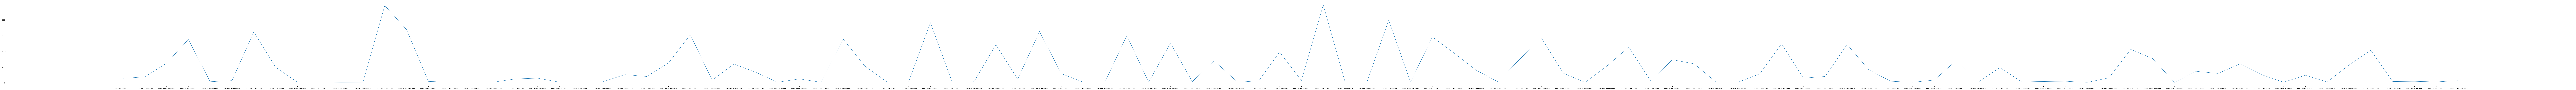

In [52]:
x = df3["Timestamp"]
y = df3["Amount"]

#3 Setup plot
fig, ax = plt.subplots(figsize=(300,10))

#4 Plot data
ax.plot(x, y);